In [3]:
%pylab inline
import numpy as np
import netCDF4 as netCDF  # file format
import tracpy
import tracpy.plotting
from tracpy.tracpy_class import Tracpy
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Location of TXLA model output file and grid, on a thredds server.
loc = 'http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg'

In [57]:
# Number of days to run the drifters.
ndays = 30

# Start date in date time formatting
# date = datetime.datetime(2009, 11, 25, 0)   # 25 November 2009
date = datetime.datetime(2014, 6, 25, 0)    # 25 June 2014

# Time between outputs
tseas = 3600 # 1 hour between outputs, in seconds 

# Time units
time_units = 'seconds since 1970-01-01'

In [58]:
# Sets a smaller limit than between model outputs for when to force interpolation if hasn't already occurred.
nsteps = 5
# Controls the sampling frequency of the drifter tracks.
N = 1
# Use ff = 1 for forward in time and ff = -1 for backward in time.
ff = -1

In [59]:
ah = 0. # m^2/s HORIZONTAL
av = 0. # m^2/s VERTICAL

# turbulence/diffusion flag
doturb = 0

In [60]:
# simulation name, used for saving results into netcdf file
name = 'fgb'

In [61]:
# for 3d flag, do3d=0 makes the run 2d and do3d=1 makes the run 3d
do3d = 0

## Choose method for vertical placement of drifters
z0 = 's' # I know the size from checking #'s after eliminating those outside domain ' #'z' #'salt' #'s' 
num_layers = 30
zpar = num_layers-1 # 29 #-10 #grid['km']-1 # 30 #grid['km']-1

# #### 3D Sample Options ####
# # for 3d flag, do3d=0 makes the run 2d and do3d=1 makes the run 3d
# do3d = 1

# ## Choose method for vertical placement of drifters
# z0 = np.zeros(681) # I know the size from checking #'s after eliminating those outside domain ' #'z' #'salt' #'s' 
# num_layers = 30
# zpar = 'fromZeta' #num_layers-1 # 29 #-10 #grid['km']-1 # 30 #grid['km']-1
# ####

In [62]:
proj = tracpy.tools.make_proj('nwgom-pyproj')

In [63]:
# Read in grid
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

# Initialize Tracpy class
tp = Tracpy(loc, grid, name=name, tseas=tseas, ndays=ndays, nsteps=nsteps,
            N=N, ff=ff, ah=ah, av=av, doturb=doturb, do3d=do3d, z0=z0, zpar=zpar, time_units=time_units)

## Entire region

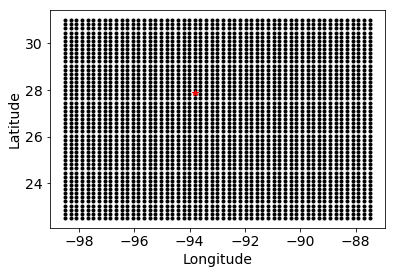

-- / 2695  drifters NaN-ed out.


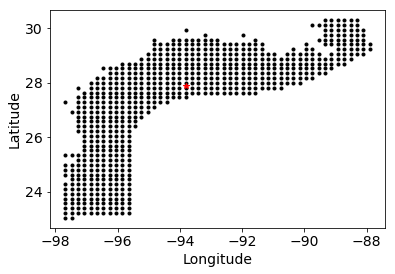

In [64]:
# Input starting locations as real space lon,lat locations
lon0, lat0 = np.meshgrid(np.linspace(-98.5,-87.5,55), \
                            np.linspace(22.5,31,49)) # whole domain, 20 km
plt.plot(lon0, lat0, marker='.', color='k', linestyle='none')
plt.plot(-93.8147,27.884, marker="*", color='r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
# Eliminate points that are outside domain or in masked areas
lon0, lat0 = tracpy.tools.check_points(lon0, lat0, tp.grid)
plt.plot(lon0, lat0, marker='.', color='k', linestyle='none')
plt.plot(-93.8147,27.884, marker="*", color='r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Zoom in on the banks

0 / 100  drifters NaN-ed out.


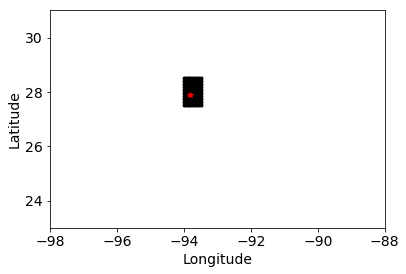

In [65]:
lon0, lat0 = np.meshgrid(np.linspace(-94,-93.5,10), \
                            np.linspace(27.5,28.5,10)) # whole domain, 20 km
lon0, lat0 = tracpy.tools.check_points(lon0, lat0, tp.grid)
plt.plot(lon0, lat0, marker='.', color='k', linestyle='none')
plt.plot(-93.8147,27.884, marker="*", color='r')
plt.xlim(-98,-88)
plt.ylim(23,31)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# Note in timing that the grid was already read in
lonp, latp, zp, t, T0, U, V = tracpy.run.run(tp, date, lon0, lat0)

/Users/mollykerwick/Documents/projects/tracpy/tracpy/inout.py:75: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  istart = find(dates <= date)[-1]


Using GCM model output index  0
Using GCM model output index  1
Using GCM model output index  2
Using GCM model output index  3
Using GCM model output index  4
Using GCM model output index  5
Using GCM model output index  6
Using GCM model output index  7
Using GCM model output index  8
Using GCM model output index  9
Using GCM model output index  10
Using GCM model output index  11
Using GCM model output index  12
Using GCM model output index  13
Using GCM model output index  14
Using GCM model output index  15
Using GCM model output index  16
Using GCM model output index  17
Using GCM model output index  18
Using GCM model output index  19
Using GCM model output index  20
Using GCM model output index  21
Using GCM model output index  22
Using GCM model output index  23
Using GCM model output index  24
Using GCM model output index  25
Using GCM model output index  26
Using GCM model output index  27
Using GCM model output index  28
Using GCM model output index  29
Using GCM model outp

Using GCM model output index  245
Using GCM model output index  246
Using GCM model output index  247
Using GCM model output index  248
Using GCM model output index  249
Using GCM model output index  250
Using GCM model output index  251
Using GCM model output index  252
Using GCM model output index  253
Using GCM model output index  254
Using GCM model output index  255
Using GCM model output index  256
Using GCM model output index  257
Using GCM model output index  258
Using GCM model output index  259
Using GCM model output index  260
Using GCM model output index  261
Using GCM model output index  262
Using GCM model output index  263
Using GCM model output index  264
Using GCM model output index  265
Using GCM model output index  266
Using GCM model output index  267
Using GCM model output index  268
Using GCM model output index  269
Using GCM model output index  270
Using GCM model output index  271
Using GCM model output index  272
Using GCM model output index  273
Using GCM mode

In [1]:
fig = plt.figure(figsize=(9.4, 7.7), dpi=100)
ax = tracpy.plotting.background(grid, fig=fig, extent=[-98, -87.5, 22.8, 30.5],
               col='lightgrey', halpha=1, outline=[1, 1, 0, 1], res='50m')
tracpy.plotting.tracks(lonp, latp, tp.name, grid, fig=fig, ax=ax)

NameError: name 'plt' is not defined